# Neural Network with TensorFlow (Two Hidden Layers - Lower Learning Rate)
Two hidden layers with 10 units each and dropout - with reduced learning rate

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


## Load Datasets


In [54]:
train = pd.read_csv('11-10_train_dataset_W1.csv')
val = pd.read_csv('11-10_val_dataset_W1.csv')

train.set_index('pid', inplace=True)
val.set_index('pid', inplace=True)

X_train_binary = train.drop(['BDI2', 'dep'], axis=1).values
y_train_binary = train['dep'].values
X_val_binary = val.drop(['BDI2', 'dep'], axis=1).values
y_val_binary = val['dep'].values

#the regression data has NaN values that need to be dropped

train_reg = train.dropna(inplace=False)
val_reg = val.dropna(inplace=False)

X_train_reg = train_reg.drop(['BDI2', 'dep'], axis=1).values
y_train_regression = train_reg['BDI2'].values
X_val_reg = val_reg.drop(['BDI2', 'dep'], axis=1).values
y_val_regression = val_reg['BDI2'].values

input_dim_binary = X_train_binary.shape[1]
input_dim_regression = X_train_reg.shape[1] 

#normalize features
scaler_binary = StandardScaler()
X_train_binary = scaler_binary.fit_transform(X_train_binary)
X_val_binary = scaler_binary.transform(X_val_binary)

scaler_regression = StandardScaler()
X_train_reg = scaler_regression.fit_transform(X_train_reg)
X_val_reg = scaler_regression.transform(X_val_reg)

## Define Model Architecture
Two hidden layers with 10 units each and dropout

In [6]:
# Set random seed for reproducibility
tf.random.set_seed(230)
np.random.seed(230)

In [55]:

input_dim = input_dim_binary  # Replace with your actual number of features

model_binary = keras.Sequential([

    layers.Input(shape=(input_dim,)),
    
    # First hidden layer with 10 units
    layers.Dense(10, activation='relu', name='hidden_layer_1'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout_1'),
    
    # Second hidden layer with 10 units
    layers.Dense(10, activation='relu', name='hidden_layer_2'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout_2'),
    
    # Output layer for binary classification
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Display model architecture
model_binary.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │        51,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,981 (203.05 KB)

 Trainable params: 51,981 (203.05 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:

input_dim = input_dim_regression  

model_BDI = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim,)),
    
    # First hidden layer with 10 units
    layers.Dense(10, activation='relu', name='hidden_layer_1', kernel_initializer='he_normal'),
    
    # Dropout layer
    layers.Dropout(0.2, name='dropout_1'),
    
    # Second hidden layer with 10 units
    layers.Dense(10, activation='relu', name='hidden_layer_2', kernel_initializer='he_normal'),
    
    # Dropout layer
    layers.Dropout(0.2, name='dropout_2'),
    
    # Output layer for regression
    layers.Dense(1, activation=None, name='output_layer')
])

model_BDI.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │        51,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,981 (203.05 KB)

 Trainable params: 51,981 (203.05 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model (with Lower Learning Rate)

In [61]:
# Compile the model with lower learning rate
# Default Adam learning rate is 0.001, using 0.0001 here

model_binary.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_BDI.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001, clipnorm=1.0),
    loss='mse',
    metrics=['mae']
)

## Train Model

In [62]:
# Train the binary model
history_binary = model_binary.fit(
    X_train_binary,
    y_train_binary,  # Binary target
    epochs=100,
    batch_size=X_train_binary.shape[0],  # Full-batch training
    validation_data=(X_val_binary, y_val_binary),
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - accuracy: 0.6465 - loss: 0.5910 - val_accuracy: 0.5581 - val_loss: 0.7681
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5758 - loss: 0.6116 - val_accuracy: 0.5581 - val_loss: 0.7681
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6263 - loss: 0.5940 - val_accuracy: 0.5581 - val_loss: 0.7679
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5960 - loss: 0.6098 - val_accuracy: 0.5581 - val_loss: 0.7679
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5859 - loss: 0.6547 - val_accuracy: 0.5581 - val_loss: 0.7678
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6869 - loss: 0.6086 - val_accuracy: 0.5581 - val_loss: 0.7678
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5960 - loss: 0.6506 - val_accuracy: 0.5581 - val_loss: 0.7678
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6061 - loss: 0.6365 - val_accuracy: 0.5581 - val_loss

In [63]:
# Train the BDI regression model
history_BDI = model_BDI.fit(
    X_train_reg,
    y_train_regression,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reg, y_val_regression),
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 263.0054 - mae: 12.7657 - val_loss: 266.1425 - val_mae: 12.8674
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 261.7964 - mae: 12.6967 - val_loss: 265.9754 - val_mae: 12.8602
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 264.3823 - mae: 12.7679 - val_loss: 265.7481 - val_mae: 12.8503
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 265.9741 - mae: 12.7478 - val_loss: 265.5422 - val_mae: 12.8431
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 266.8944 - mae: 12.7856 - val_loss: 265.3227 - val_mae: 12.8364
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 264.9768 - mae: 12.7743 - val_loss: 265.1489 - val_mae: 12.8309
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 269.8615 - mae: 13.0087 - val_loss: 265.0081 - val_mae: 12.8268
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 268.7264 - mae: 12.7716 - val_loss: 264.8709 - val_mae: 12.8222
Epoch 9/100
4/4 ━━━━━━━━

## Evaluate Model

In [64]:
# Evaluate binary model
val_loss_binary, val_accuracy = model_binary.evaluate(X_val_binary, (y_val_binary > 0).astype(int))
print(f"Binary Model - Validation Loss: {val_loss_binary:.4f}")
print(f"Binary Model - Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5814 - loss: 0.7695 
Binary Model - Validation Loss: 0.7695
Binary Model - Validation Accuracy: 0.5814


In [65]:
# Evaluate BDI regression model
val_loss_BDI, val_mae = model_BDI.evaluate(X_val_reg, y_val_regression)
print(f"BDI Model - Validation Loss (MSE): {val_loss_BDI:.4f}")
print(f"BDI Model - Validation MAE: {val_mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 249.1648 - mae: 12.4366
BDI Model - Validation Loss (MSE): 249.1648
BDI Model - Validation MAE: 12.4366


## Plot Training History

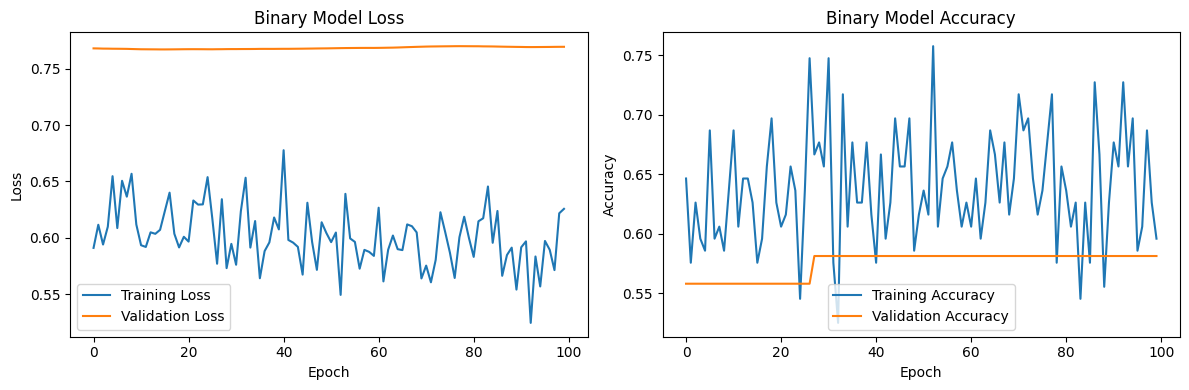

In [66]:
import matplotlib.pyplot as plt

# Plot binary model training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Validation Loss')
plt.title('Binary Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Binary Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

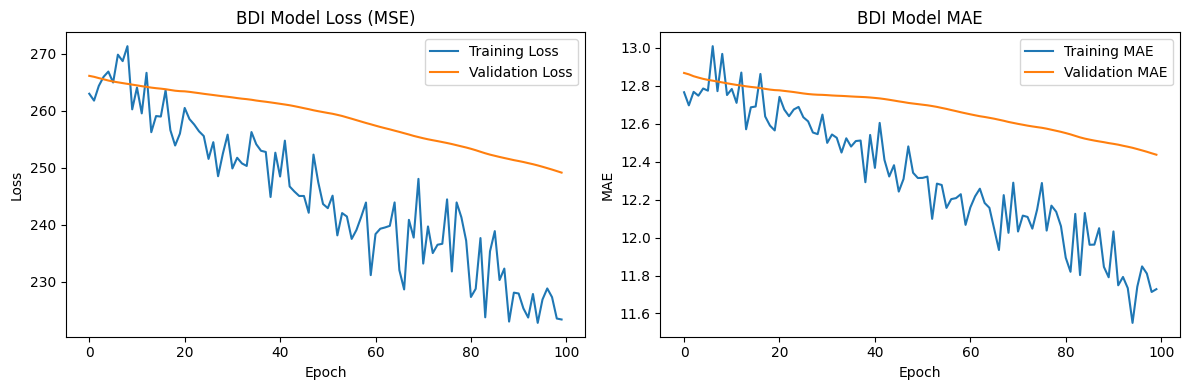

In [67]:
# Plot BDI model training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_BDI.history['loss'], label='Training Loss')
plt.plot(history_BDI.history['val_loss'], label='Validation Loss')
plt.title('BDI Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_BDI.history['mae'], label='Training MAE')
plt.plot(history_BDI.history['val_mae'], label='Validation MAE')
plt.title('BDI Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Make Predictions

In [68]:
# Make predictions on validation set
predictions = model_BDI.predict(X_val_reg)
print(f"Predictions shape: {predictions.shape}")
print(f"First 5 predictions: {predictions[:5].flatten()}")

predictions_binary = model_binary.predict(X_val_binary)
print(f"Predictions shape: {predictions_binary.shape}")
print(f"First 5 predictions: {predictions_binary[:5].flatten()}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predictions shape: (42, 1)
First 5 predictions: [ 1.5814918  -0.12028712  0.01341887  2.181542    0.4950258 ]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predictions shape: (43, 1)
First 5 predictions: [0.4283311  0.39443725 0.6281132  0.48629814 0.43198666]


In [73]:
#dataframe with the predictions and true values for BDI regression
bdi_results = pd.DataFrame({
    'True_BDI': y_val_regression,
    'Predicted_BDI': predictions.flatten()
})

#display the results
bdi_results.to_clipboard(excel=True)

bdi_results.to_csv('bdi_regression_predictions_two_layers.csv', index=False)

In [74]:
#binary results dataframe
binary_results = pd.DataFrame({
    'True_Depression': y_val_binary,
    'Predicted_Probability': predictions_binary.flatten()
})
binary_results.to_csv('binary_classification_predictions_two_layers.csv', index=False)